In [2]:
import os
import numpy as np
import pandas as pd
import math
from matplotlib import pyplot

In [47]:
print(os.listdir())

['R&D.csv', 'owid-energy-metadata.csv', 'installed-renewable-energy-capacity-world-megawatt.csv', 'world capacity.csv', '.DS_Store', 'electricity balance.csv', 'Untitled.ipynb', 'levelized-cost-of-energy.csv', 'Total GDP OECD.csv', 'annual-change-renewables.csv', 'BDC - Main.csv', 'installed-renewable-energy-capacity-megawatts.csv', 'GHG Energy.csv', '.ipynb_checkpoints', 'GHG FC.csv', 'owid-energy-data.csv', '.idea']


In [4]:
df = pd.read_csv("BDC - Main.csv")
df

,Year,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Net change of Clean energy compared to previou...,151.676,165.454,57.186,361.471,50.415,-4.938,140.663,347.567,233.351,...,831.009,509.233,740.099,851.763,608.558,487.307,813.462,900.567,977.682,962.745
1,Green House Gas Emission by Gallons CO2,16121.000,16840.000,17771.000,17722.000,17768.000,18762.000,19357.000,19860.000,20444.000,...,34187.000,35148.000,35557.000,36179.000,36273.000,36167.000,36182.000,36771.000,37597.000,37630.000


In [50]:
years = df.iloc[:0, 1:]

In [51]:
yearsList = list(years)

In [52]:
changes = df.iloc[0:1, 1:]

In [53]:
changesList = changes.values.tolist()[0]

In [76]:
CEList = []
CEList.append(round(changesList[0], 2))
for i in range(1, len(changesList)):
    CEList.append(round(CEList[i - 1] + changesList[i], 2))

In [55]:
ghg = df.iloc[1:, 1:]

In [57]:
ghg = ghg.values.tolist()[0]

In [72]:
ghgList = []
ghgList.append(round(ghg[0], 2))
for i in range(1, len(ghg)):
    ghgList.append(round(ghgList[i - 1] + ghg[i], 2))

In [75]:
print(ghgList)

[16121.0, 32961.0, 50732.0, 68454.0, 86222.0, 104984.0, 124341.0, 144201.0, 164645.0, 184801.0, 204548.0, 224139.0, 243808.0, 264139.0, 284788.0, 305818.0, 327518.0, 349951.0, 372836.0, 396078.0, 419441.0, 442703.0, 466096.0, 489595.0, 513743.0, 538396.0, 563468.0, 588722.0, 614108.0, 640315.0, 666884.0, 693774.0, 721871.0, 751253.0, 781716.0, 813107.0, 845603.0, 878358.0, 910625.0, 944812.0, 979960.0, 1015517.0, 1051696.0, 1087969.0, 1124136.0, 1160318.0, 1197089.0, 1234686.0, 1272316.0]


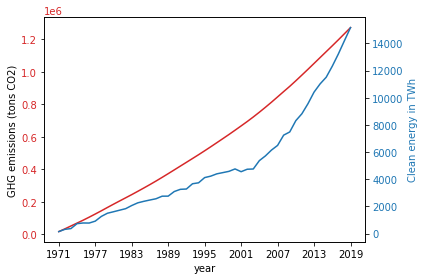

In [78]:
fig, ax1 = pyplot.subplots()

color = 'tab:red'

ax1.set_xlabel("year")
ax1.set_ylabel("GHG emissions (tons CO2)")
ax1.plot(yearsList, ghgList, color=color)
ax1.xaxis.set_major_locator(pyplot.MaxNLocator(10))
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Clean energy in TWh', color=color)  # we already handled the x-label with ax1
ax2.plot(yearsList, CEList, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
pyplot.show()

In [ ]:
# since measuring the absolute value might not be accurate, we could also measure the change rate

In [92]:
pctGHG = []
pctCE = []

for i in range(len(CEList) - 1):
    pctCE.append(round(((CEList[i + 1] - CEList[i]) / CEList[i] * 100), 2))
    pctGHG.append(round(((ghgList[i + 1] - ghgList[i]) / ghgList[i] * 100), 2))

pctCE.append(pctCE[len(pctCE)- 1])
pctGHG.append(pctCE[len(pctCE)- 1])

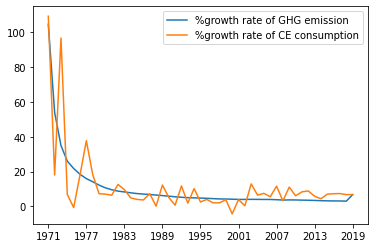

In [97]:
fig, ax1 = pyplot.subplots()

pyplot.plot(yearsList, pctGHG)
pyplot.plot(yearsList, pctCE)
pyplot.legend(["%growth rate of GHG emission", "%growth rate of CE consumption"])

ax1.xaxis.set_major_locator(pyplot.MaxNLocator(10))


pyplot.show()

In [98]:
# linear regression starts here
import tensorflow as tf

nan
nan


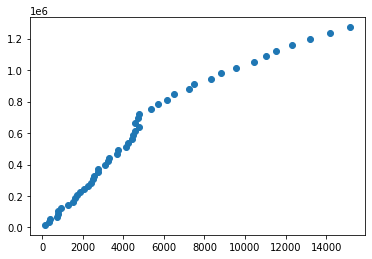

In [104]:
learning_rate = 0.01
training_epochs = 100

x_train = CEList
y_train = ghgList


weight = tf.Variable(0.)
bias = tf.Variable(0.)


def line(x):
    return weight * x + bias


def squared_error(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))


for epoch in range(training_epochs):
    with tf.GradientTape() as tape:
        y_predicted = line(x_train)
        loss = squared_error(y_predicted, y_train)
        gradients = tape.gradient(loss, [weight, bias])
        weight.assign_sub(gradients[0] * learning_rate)
        bias.assign_sub(gradients[1] * learning_rate)
#         print(f"Epoch count {epoch}: Loss value: {loss.numpy()}")

        
pyplot.scatter(CEList, ghgList)
pyplot.plot(x_train, line(x_train), color='tab:red')

print(weight.numpy())
print(bias.numpy())

plt.show()